# Imports:

In [7]:
from collections import defaultdict
import sys, os, re, argparse, natsort
import pandas as pd
import numpy as np
from tqdm import tqdm
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
from IPython.display import display, HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Show/hide the code."></form>''')

# Functions:

In [8]:
def read_annotation(file):
    columns = ["sample", "total_circRNAs", "total_exonic", "true_exonic", "single_annotated_junction", 
               "antisens_exonic", "monoexonic", "total_infraexonic", "infraexonic_sens", 
               "infraexonic_antisens", "true_intronic", "non_annotated", "nb_c", "nb_nc"]
    df = pd.read_table(file, sep = '\t', names=columns)
    return df

# I. Number of circRNAs for each category: 

In [9]:
df_stats_annot = read_annotation("../stats_annotation_all.tsv")
display(df_stats_annot)

,sample,total_circRNAs,total_exonic,true_exonic,single_annotated_junction,antisens_exonic,monoexonic,total_infraexonic,infraexonic_sens,infraexonic_antisens,true_intronic,non_annotated,nb_c,nb_nc
0,cow-liver-B022,2187,1415,1240,175,0,33,324,324,0,5,767,1227,1
1,pig-liver-old1,1589,1042,989,52,0,39,141,133,8,10,530,975,6
2,pig-testis-5,7038,5138,4604,533,0,134,245,238,7,27,1867,4561,28
3,cow-liver-K013,2233,1388,1207,181,0,36,456,454,2,3,840,1199,1
4,cow-testis-neonat1,5470,4227,3709,518,0,120,150,142,8,18,1217,3685,7
5,pig-liver-young-1,3980,1875,1714,159,1,49,635,606,29,26,2052,1693,7
6,cow-testis-adult2,4013,2911,2464,447,0,82,147,145,2,16,1084,2441,2
7,cow-liver-B005,1892,1144,1003,141,0,28,353,353,0,7,741,996,1
8,cow-liver-B004,1978,1253,1089,164,0,27,372,372,0,4,721,1083,0
9,cow-testis-adult3,3275,2351,2037,314,0,72,123,118,5,15,904,2023,2


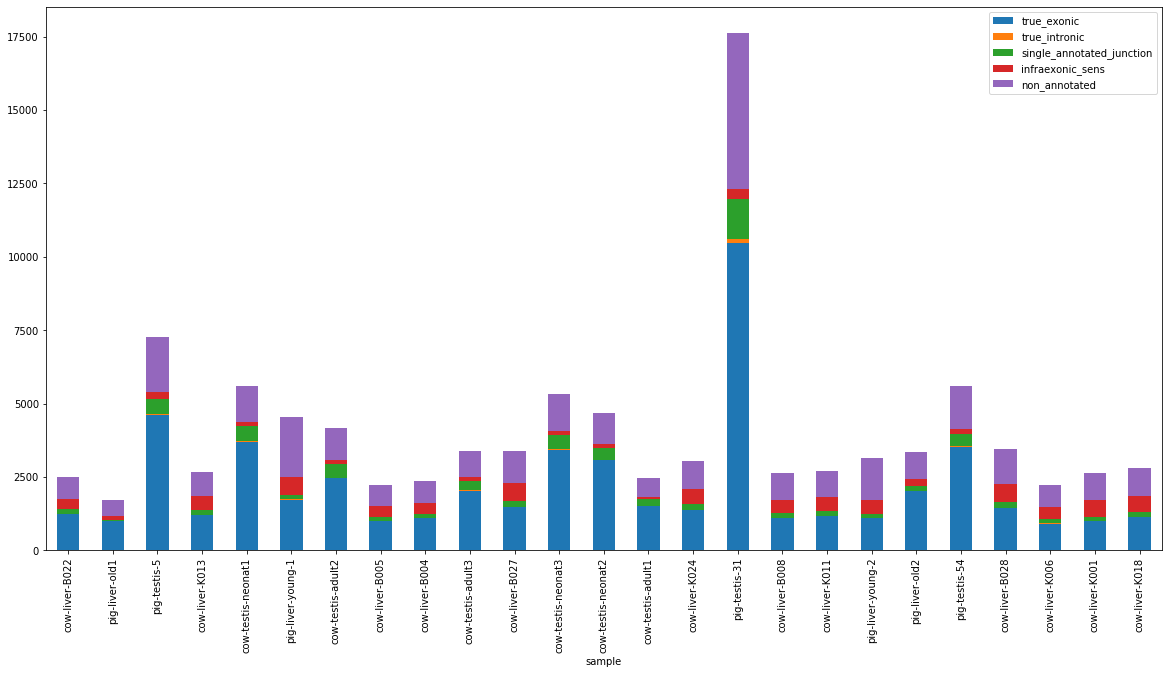

In [10]:
# Stacked bar plot:
columns_df1 = ["sample", "true_exonic", "true_intronic", "single_annotated_junction",
               "infraexonic_sens", "non_annotated"]

df1 = pd.DataFrame(df_stats_annot, columns=columns_df1)
df1.plot.bar(x='sample', stacked=True, figsize=(20,10));

,cow-liver-B022,pig-liver-old1,pig-testis-5,cow-liver-K013,cow-testis-neonat1,pig-liver-young-1,cow-testis-adult2,cow-liver-B005,cow-liver-B004,cow-testis-adult3,...,pig-testis-31,cow-liver-B008,cow-liver-K011,pig-liver-young-2,pig-liver-old2,pig-testis-54,cow-liver-B028,cow-liver-K006,cow-liver-K001,cow-liver-K018
True exonic,49.382716,57.701284,63.337460,44.953445,66.184868,37.612464,59.287777,44.677060,46.340426,60.123967,...,59.360290,41.856061,43.470218,34.731490,60.203167,62.941176,41.927083,41.410488,37.842988,40.350250
True intronic,0.199124,0.583431,0.371440,0.111732,0.321199,0.570551,0.384986,0.311804,0.170213,0.442739,...,0.799637,0.151515,0.147984,0.699078,0.507918,0.445633,0.144676,0.090416,0.076220,0.178699
Single annotated junction,6.969335,3.033839,7.332508,6.741155,9.243398,3.489138,10.755534,6.280624,6.978723,9.268005,...,7.701469,6.022727,6.104329,3.590721,4.571258,7.112299,6.134259,6.283906,5.945122,6.361687
Infraexonic sens,12.903226,7.759627,3.274178,16.908752,2.533904,13.298223,3.488932,15.723831,15.829787,3.482881,...,1.911189,17.272727,18.128006,15.030187,7.080968,3.333333,16.811343,18.444846,21.836890,19.335239
Non annotated,30.545599,30.921820,25.684413,31.284916,21.716631,45.029625,26.082772,33.006682,30.680851,26.682409,...,30.227415,34.696970,32.149464,45.948522,27.636690,26.167558,34.982639,33.770344,34.298780,33.774124


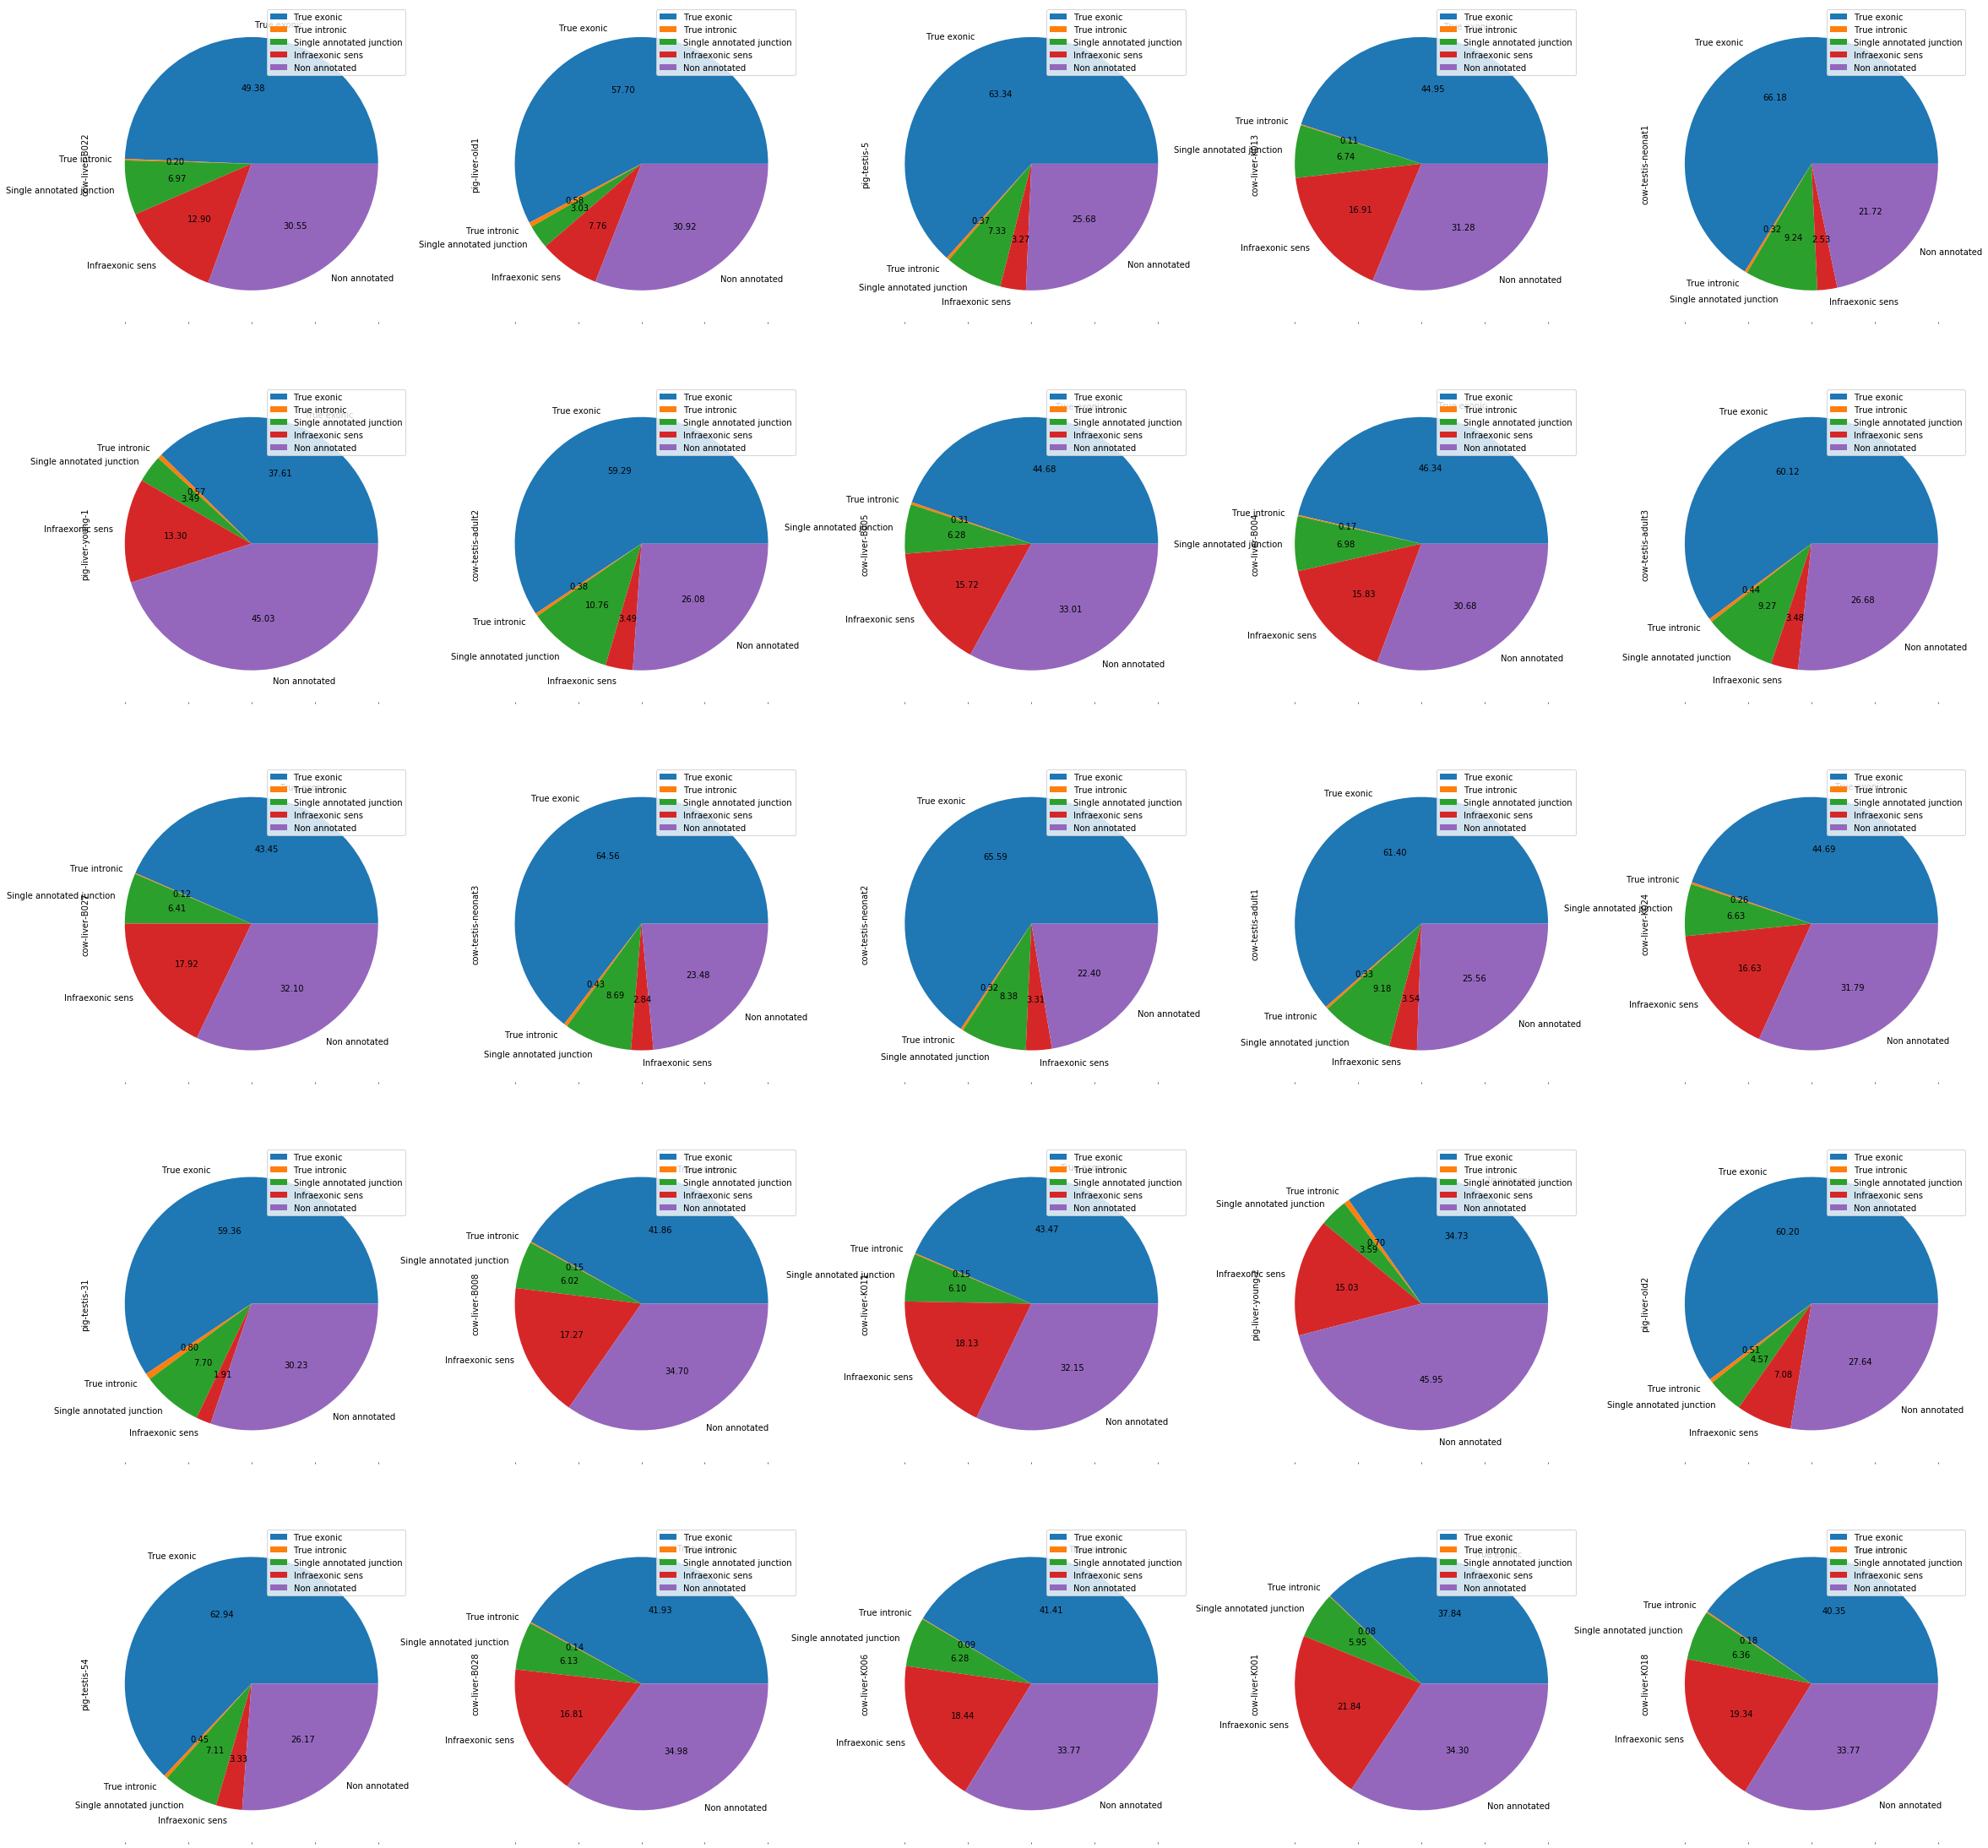

In [11]:
# Pie:
df1["tot"] = (df_stats_annot["true_exonic"] + df_stats_annot["true_intronic"] + 
              df_stats_annot["single_annotated_junction"] + df_stats_annot["infraexonic_sens"] + 
              df_stats_annot["non_annotated"])

df1["%_true_exonic"] = (df1["true_exonic"]*100)/df1["tot"]
df1["%_true_intronic"] = (df1["true_intronic"]*100)/df1["tot"]
df1["%_single_annotated_junction"] = (df1["single_annotated_junction"]*100)/df1["tot"]
df1["%_infraexonic_sens"] = (df1["infraexonic_sens"]*100)/df1["tot"]
df1["%_non_annotated"] = (df1["non_annotated"]*100)/df1["tot"]

d = df1.set_index('sample')[["%_true_exonic","%_true_intronic","%_single_annotated_junction", 
                             "%_infraexonic_sens", "%_non_annotated"]].T.to_dict('list')
df2 = pd.DataFrame(d, index=['True exonic', 'True intronic', 'Single annotated junction', 
                             'Infraexonic sens', 'Non annotated'])
display(df2.head(5))
plot = df2.plot.pie(subplots=True, autopct='%.2f', figsize=(40, 40), layout=(5,5));

# II. Biotypes distribution:

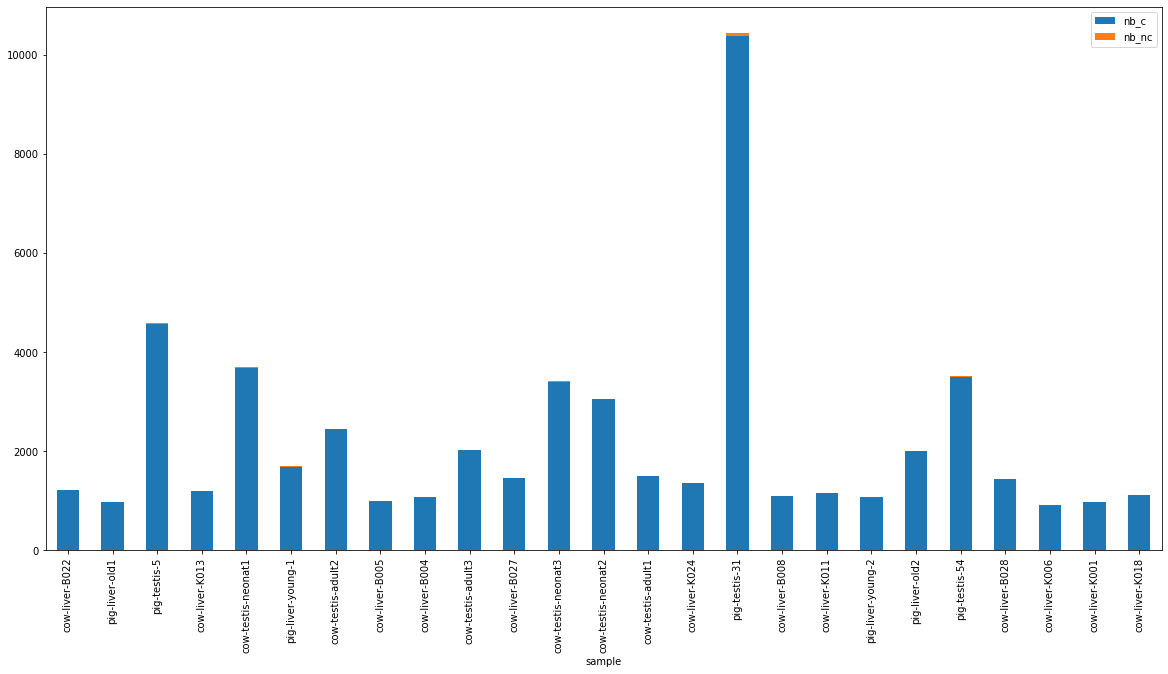

In [12]:
# Stacked bar plot:
columns_biotypes = ["sample", "nb_c", "nb_nc"]
df_biotypes = pd.DataFrame(df_stats_annot, columns=columns_biotypes)
df_biotypes.plot.bar(x='sample', stacked=True, figsize=(20,10));

,cow-liver-B022,pig-liver-old1,pig-testis-5,cow-liver-K013,cow-testis-neonat1,pig-liver-young-1,cow-testis-adult2,cow-liver-B005,cow-liver-B004,cow-testis-adult3,...,pig-testis-31,cow-liver-B008,cow-liver-K011,pig-liver-young-2,pig-liver-old2,pig-testis-54,cow-liver-B028,cow-liver-K006,cow-liver-K001,cow-liver-K018
Coding,99.918567,99.388379,99.389845,99.916667,99.810401,99.588235,99.918133,99.899699,100.0,99.901235,...,99.29173,100.0,99.914384,99.540441,99.353555,99.460227,99.791232,100.0,99.898374,99.821906
Non-coding,0.081433,0.611621,0.610155,0.083333,0.189599,0.411765,0.081867,0.100301,0.0,0.098765,...,0.70827,0.0,0.085616,0.459559,0.646445,0.539773,0.208768,0.0,0.101626,0.178094


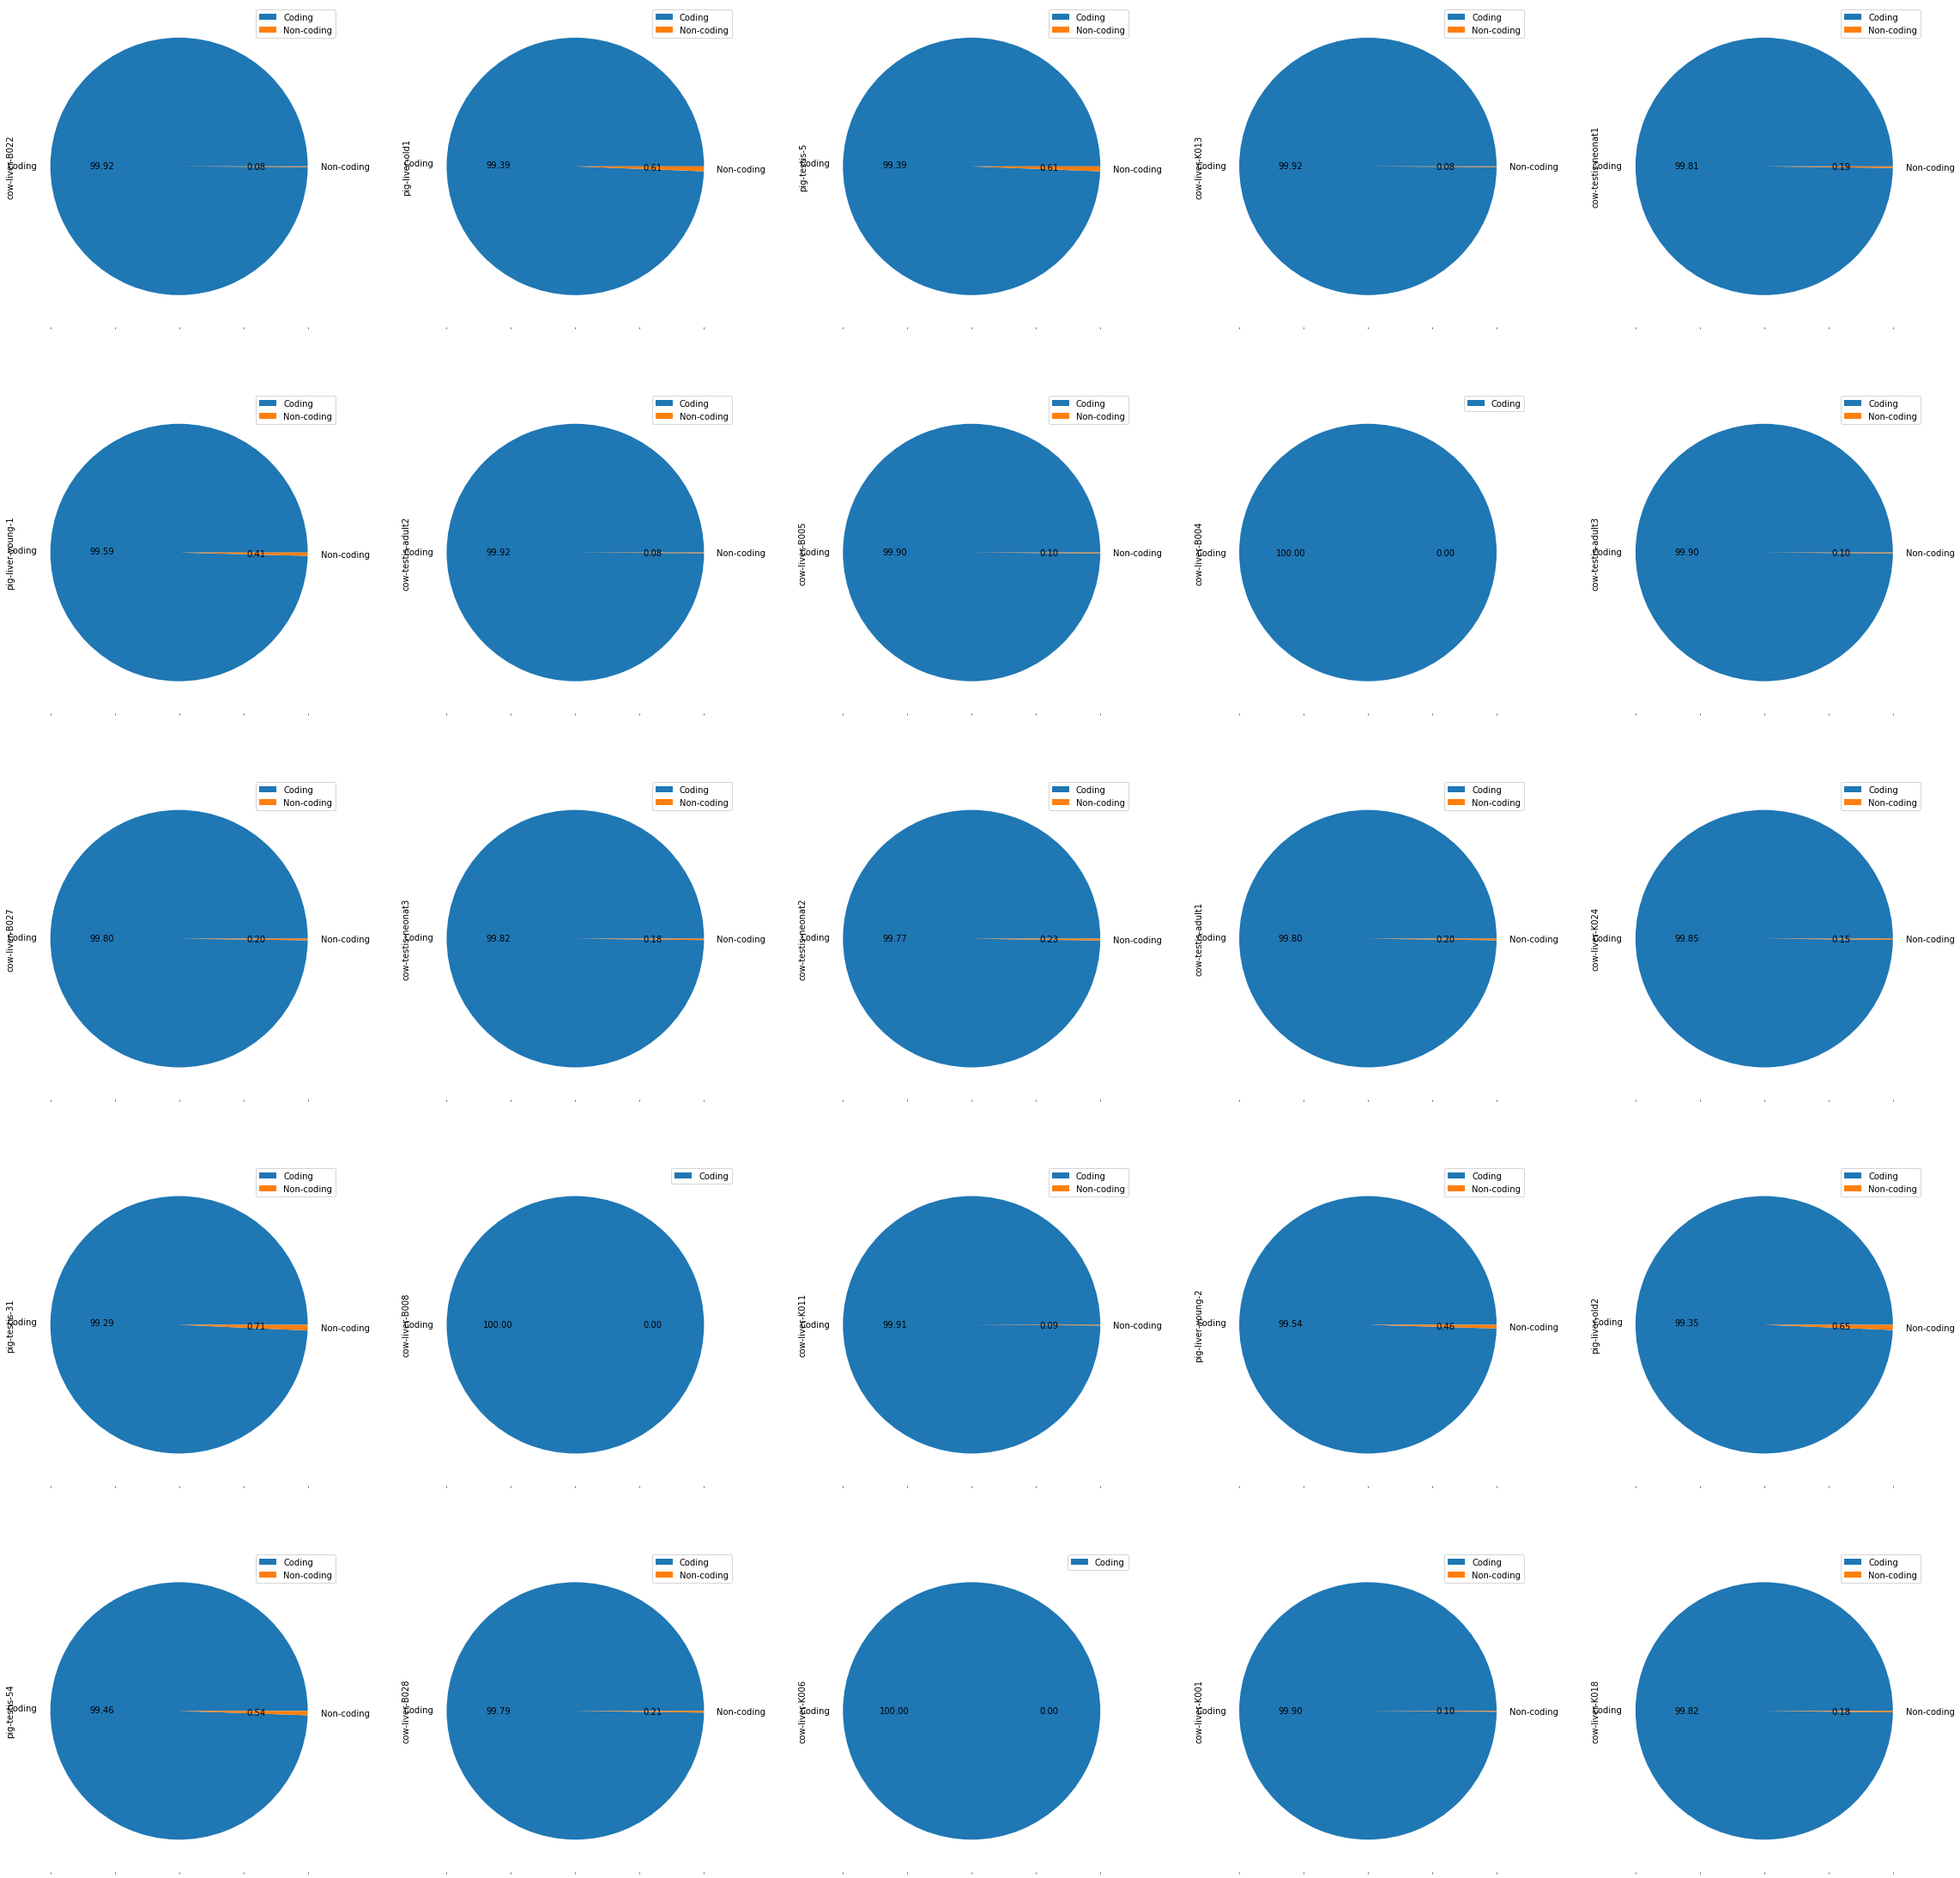

In [13]:
# Pie:
df_biotypes["nb_tot"] = df_biotypes["nb_c"] + df_biotypes["nb_nc"]
df_biotypes["%_c"] = (df_biotypes["nb_c"]*100)/df_biotypes["nb_tot"]
df_biotypes["%_nc"] = (df_biotypes["nb_nc"]*100)/df_biotypes["nb_tot"]

d = df_biotypes.set_index('sample')[["%_c","%_nc"]].T.to_dict('list')
df_biotypes_pie = pd.DataFrame(d, index=['Coding', 'Non-coding'])
display(df_biotypes_pie.head(5))
plot = df_biotypes_pie.plot.pie(subplots=True, autopct='%.2f', figsize=(40, 40), layout=(5,5));